In [1]:
import faiss
import numpy as np


def train_search(data):
    # train similarity search model
    nb, d = data.shape
    index = faiss.IndexFlatL2(d)   # build the index
    print("Index trained: {}".format(index.is_trained))
    index.add(data)                  # add vectors to the index
    print("Index total: {}".format(index.ntotal))
    return index

In [2]:
import linecache


def check(nodes, k, emb, ind, file):
    """ 
    emb is a 2-d numpy array of embeddings
    read https://stackoverflow.com/questions/287871/how-to-print-colored-text-in-terminal-in-python
    how to print with different colours
    """
    if len(nodes) == 1:
        D, I = ind.search(emb[nodes].reshape(1, -1), k)
    else:
        D, I = ind.search(emb[nodes], k)
    for row in I:
        print('\x1b[0;35;43m' + '{} nearest neighbours of node {}'.format(
            k - 1, row[0]) + '\x1b[0m')
        print('\x1b[0;35;43m' + linecache.getline(file, row[0] + 1) + '\x1b[0m')
        for node in row[1:]:
            print("  node {}, {}".format(node, linecache.getline(file, node + 1)))

In [3]:
x = np.load('node_embeddings/cnr-2000_d64wL30cS20wPN20p2q1numS40e100.npy')
idx = train_search(x)

Index trained: True
Index total: 325557


In [4]:
check([i for i in range(325557 - 10, 325557)], 4, x, idx, 'graphs/cnr-2000.urls')

3 nearest neighbours of node 325547

  node 325549, 
  node 325546, 
  node 325548, 
3 nearest neighbours of node 325548

  node 325550, 
  node 325552, 
  node 20316, 
3 nearest neighbours of node 325549

  node 325547, 
  node 325546, 
  node 325548, 
3 nearest neighbours of node 325550

  node 325552, 
  node 325551, 
  node 325548, 
3 nearest neighbours of node 325551

  node 325552, 
  node 325550, 
  node 20317, 
3 nearest neighbours of node 325552

  node 325550, 
  node 325551, 
  node 325548, 
3 nearest neighbours of node 325553

  node 182049, 
  node 315451, 
  node 325554, 
3 nearest neighbours of node 325554

  node 315451, 
  node 322082, 
  node 325553, 
3 nearest neighbours of node 325555

  node 289217, 
  node 289426, 
  node 289465, 
3 nearest neighbours of node 325556

  node 289263, 
  node 289133, 
  node 289467, 


In [5]:
nodes = np.random.randint(0, len(x), size=10)
k = 6
check(nodes, k, x, idx, 'cnr-2000.urls')

5 nearest neighbours of node 12242

  node 12184, 
  node 12193, 
  node 90836, 
  node 13172, 
  node 142317, 
5 nearest neighbours of node 21701

  node 297525, 
  node 290576, 
  node 64109, 
  node 148051, 
  node 51787, 
5 nearest neighbours of node 286389

  node 287793, 
  node 284572, 
  node 287641, 
  node 285280, 
  node 285167, 
5 nearest neighbours of node 19307

  node 19874, 
  node 19534, 
  node 172090, 
  node 172114, 
  node 19385, 
5 nearest neighbours of node 304430

  node 304467, 
  node 304428, 
  node 162460, 
  node 304420, 
  node 304432, 
5 nearest neighbours of node 33680

  node 33625, 
  node 40862, 
  node 33181, 
  node 33161, 
  node 33626, 
5 nearest neighbours of node 141872

  node 141835, 
  node 141836, 
  node 141840, 
  node 141837, 
  node 141852, 
5 nearest neighbours of node 31191

  node 40158, 
  node 43814, 
  node 35189, 
  node 37707, 
  node 35038, 
5 nearest neighbours of node 133205

  node 133209, 
  node 133218, 
  node 133220, 
  n

In [6]:
from tsnecuda import TSNE

X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(x)

In [12]:
help(TSNE)

Help on class TSNE in module tsnecuda.TSNE:

class TSNE(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, n_components=2, perplexity=50.0, early_exaggeration=12.0, learning_rate=200.0, num_neighbors=32, force_magnify_iters=250, pre_momentum=0.5, post_momentum=0.8, theta=0.5, epssq=0.0025, n_iter=1000, n_iter_without_progress=1000, min_grad_norm=1e-07, perplexity_epsilon=0.001, metric='euclidean', init='random', return_style='once', num_snapshots=5, verbose=0, random_seed=None, use_interactive=False, viz_timeout=10000, viz_server='tcp://localhost:5556', dump_points=False, dump_file='dump.txt', dump_interval=1, print_interval=10, device=0, magnitude_factor=5)
 |      Initialization method for barnes hut T-SNE class.
 |  
 |  fit_transform(self, X, y=None)
 |      Fit X into an embedded space and return that transformed output.
 |      
 |      Arguments:
 |          X {array} -- Input array, shape: (n_points, n_dimensions)
 |      
 |      Keyword Arguments:
 |          

In [7]:
X_embedded[:1]

array([[-5.1285537e-05,  2.1581203e-04]], dtype=float32)

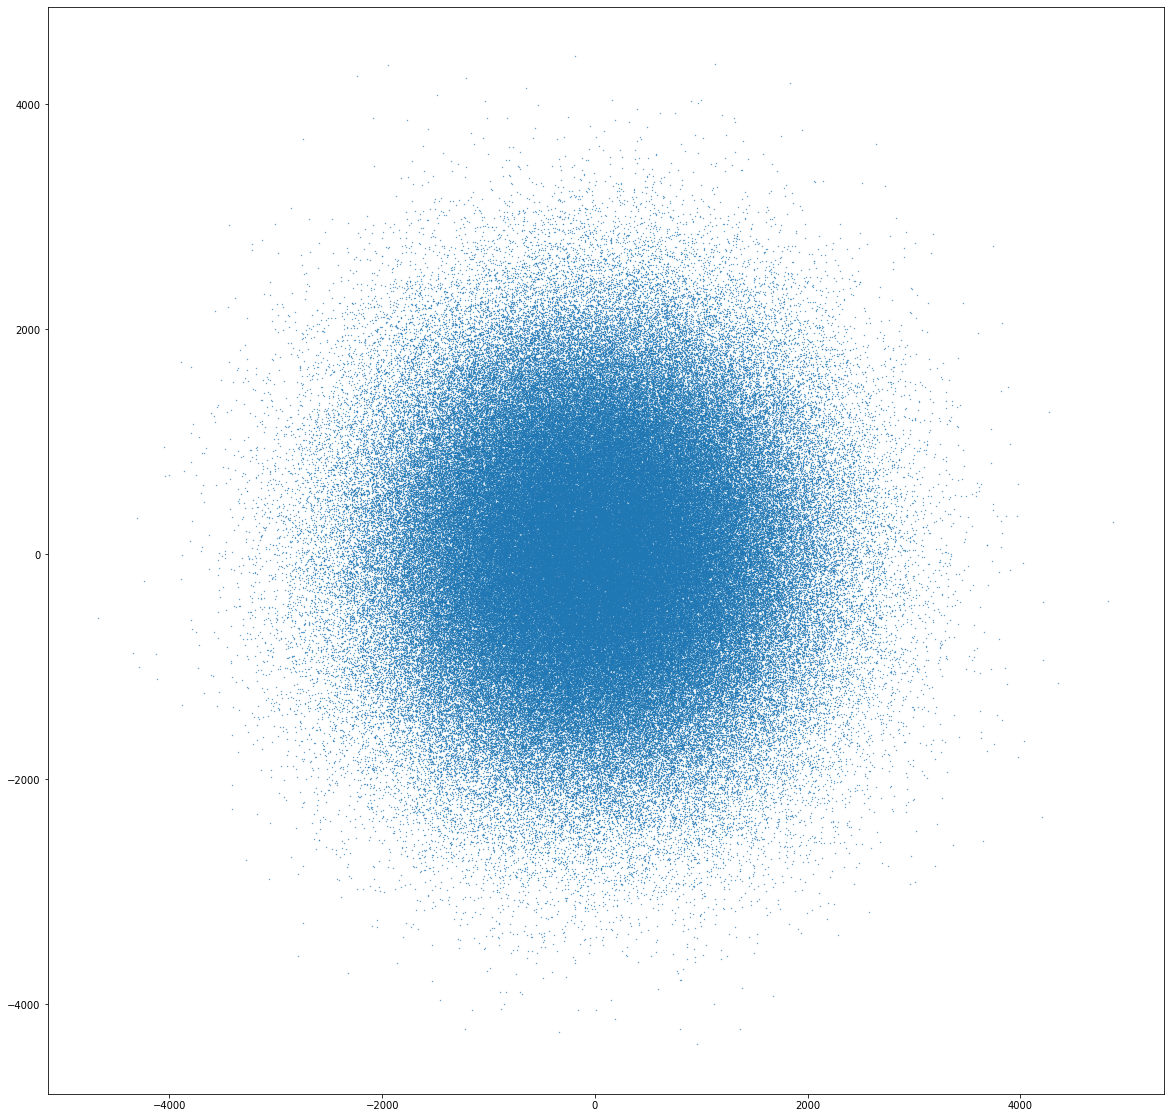

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.scatter(X_embedded[:, 0]*10**7, X_embedded[:, 1]*10**7, s=0.1)

<IPython.core.display.Javascript object>


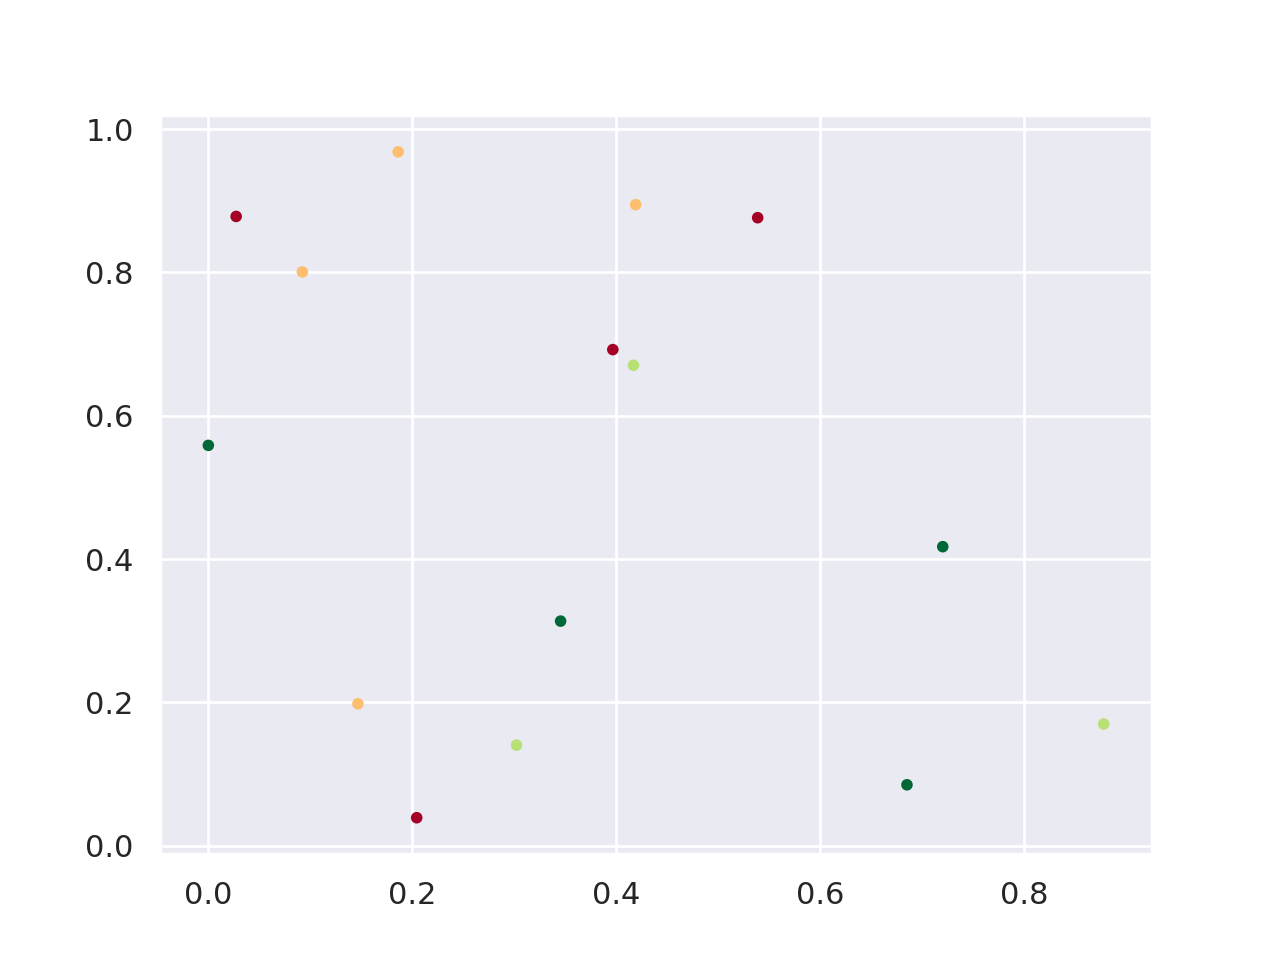

['http://acireale.src.cnr.it/acireale2001/foto/Image159.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image158.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image161.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image162.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image160.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image155.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image156.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image157.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Thum12.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image163.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image164.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image165.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image167.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image166.html\n'
 'http://acireale.src.cnr.it/acireale2001/foto/Image168.html\n']


In [49]:
# taken from 
# https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)


x = np.random.rand(15)
y = np.random.rand(15)
c = np.random.randint(1,5,size=15)
norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn
fig, ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=10, cmap=cmap, norm=norm)
annot = ax.annotate("", xy=(0,0), xytext=(10,10), textcoords="offset points",
                    bbox=dict(boxstyle="round"), fontsize='xx-small')
annot.set_visible(False)
names = [linecache.getline('graphs/cnr-2000.urls', i + 1) for i in range(15)]
names = np.array(names)
print(names)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    # text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
    #                       " ".join([names[n] for n in ind["ind"]]))
    n = ind['ind'][0]
    text = "{}, {}".format(n, names[n])
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [25]:
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


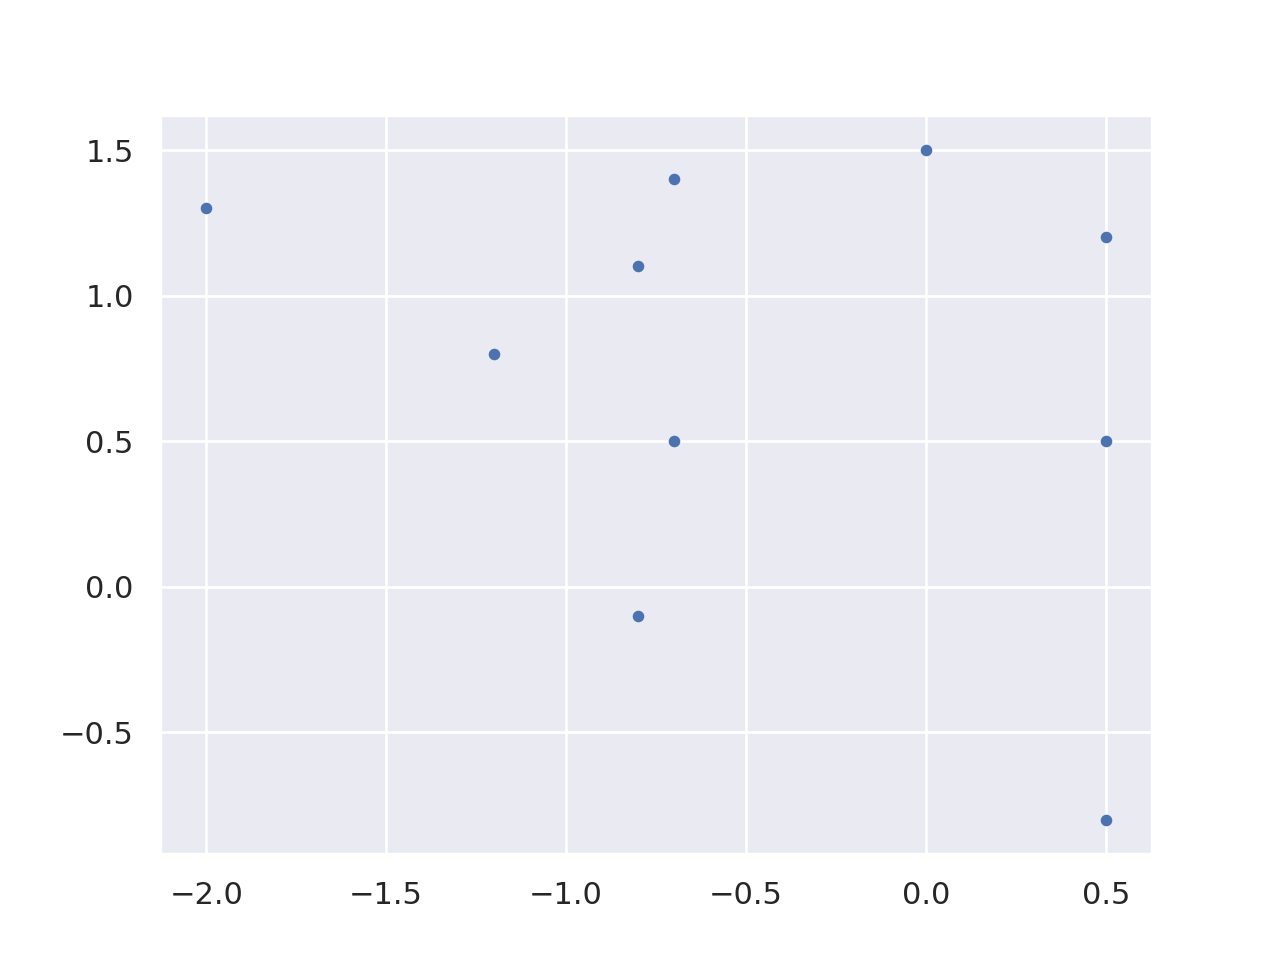

['http://www.ifc.cnr.it/Ricerca/ricerca2.html\n'
 'http://www.iia.cnr.it/\n'
 'http://www.imati.cnr.it/%7Erovida/piacenza/welcome.html\n'
 'http://www.isti.cnr.it/php-pers/iselpers.php?Ribolini+Alberto\n'
 'http://progettocopernico.itd.ge.cnr.it/imapub/esper.nsf/dllist?OpenView&Start=51&Count=30&Collapse=53\n'
 "http://bighost.area.ba.cnr.it/srs6bin/wgetz?-e+[SWISSPROT:'PLSB_HUMAN']\n"
 'http://www.imati.cnr.it/webcal/webcal.cgi?function=webday&cal=SAMI&date=20020920\n'
 'http://sd2.itd.ge.cnr.it/phpBB/privmsg.php?mode=post&u=18&sid=1d1b7ca0e81ac9b674e26df2d724ab1c\n'
 'http://sd2.itd.ge.cnr.it/phpBB/profile.php?mode=viewprofile&u=21&sid=3747df93550bd1a87443c910df1e4097\n'
 'http://m1.ira.cnr.it/pipermail/serendip/attachments/20040116/d78444a7/attachment.htm\n']


In [78]:
indices = np.random.randint(0, len(X_embedded), size=10)
const = 10**4
x = np.around(X_embedded[indices, 0]*const, decimals=1)
y = np.around(X_embedded[indices, 1]*const, decimals=1)
fig, ax = plt.subplots()
sc = plt.scatter(x, y, s=10)
annot = ax.annotate("", xy=(0,0), xytext=(10,10), textcoords="offset points",
                    bbox=dict(boxstyle="round"), fontsize='xx-small')
annot.set_visible(False)
names = [linecache.getline('graphs/cnr-2000.urls', i + 1) for i in indices]
names = np.array(names)
print(names)

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [79]:
import re

a = 'http://acireale.src.cnr.it/acireale2001/foto/Image159.html\n'
reg = r'^((.*?)+//(.*?)+/)'
for i in names:
    print(re.match(reg, i).group())

http://www.ifc.cnr.it/
http://www.iia.cnr.it/
http://www.imati.cnr.it/
http://www.isti.cnr.it/
http://progettocopernico.itd.ge.cnr.it/
http://bighost.area.ba.cnr.it/
http://www.imati.cnr.it/
http://sd2.itd.ge.cnr.it/
http://sd2.itd.ge.cnr.it/
http://m1.ira.cnr.it/


In [80]:
import re

urls = []
reg = r'^((.*?)+//(.*?)+/)'
with open('graphs/cnr-2000.urls') as f:
    for line in f:
        urls.append(re.match(reg, line).group())
        
urls = np.array(urls)
unique_elements, occ = np.unique(urls, return_counts=True)
print(len(unique_elements))
print(occ[-10:])

722
[    2   342     3    42    14     6     1   130    76 11292]
